In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df,
                                 how ='left', on='city')
combined_data_df.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
combined_data_df.dtypes



city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

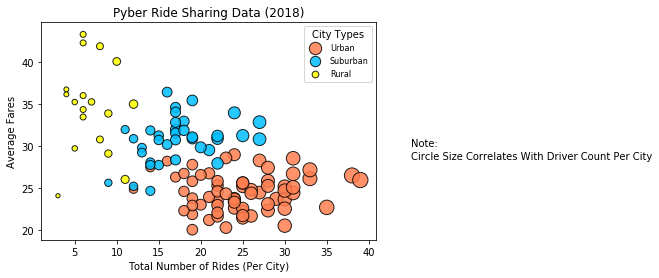

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban = combined_data_df.loc[combined_data_df["type"] =="Urban"]
suburban = combined_data_df.loc[combined_data_df["type"]=="Suburban"]
rural = combined_data_df.loc[combined_data_df["type"]=="Rural"]
# calculate average fare of the cities______________________
avg_fare_urban = urban.groupby(["city"]).mean()["fare"]
avg_fare_urban
avg_fare_suburban = suburban.groupby(["city"]).mean()["fare"]
avg_fare_suburban
avg_fare_rural = rural.groupby(["city"]).mean()["fare"]
avg_fare_rural

# calculate number of rides per city__________________________
rides_urban = urban.groupby(["city"]).count()["ride_id"]
rides_urban
rides_suburban = suburban.groupby(["city"]).count()["ride_id"]
rides_suburban
rides_rural = rural.groupby(["city"]).count()["ride_id"]
rides_rural

# calculate driver count in each city__________________________
urban_driver_count = urban.groupby(["city"]).count()["driver_count"]
suburban_driver_count = suburban.groupby(["city"]).count()["driver_count"]
rural_driver_count = rural.groupby(["city"]).count()["driver_count"]


# Build the scatter plots for each city types
urban_plt = plt.scatter(rides_urban, avg_fare_urban, marker="o", facecolors="coral", edgecolors="black",
            s=urban_driver_count * 6, alpha=0.85, label = "Urban")

suburban_plt = plt.scatter(rides_suburban, avg_fare_suburban , marker="o", facecolors="deepskyblue", edgecolors="black",
            s=suburban_driver_count * 6, alpha=0.85, label = "Suburban")              

rural_plt = plt.scatter(rides_rural, avg_fare_rural, marker="o", facecolors="yellow",edgecolors="black",
            s=rural_driver_count * 6, alpha=0.85, label = "Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares")

# Create a legend
legend = plt.legend(fontsize = 8, loc = "best", title = "City Types")
# Incorporate a text label regarding circle size
plt.text(45, 30, 'Note:')
plt.text(45, 28.5, 'Circle Size Correlates With Driver Count Per City')
# Save Figure
plt.savefig

plt.show

## Total Fares by City Type

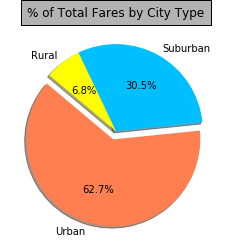

(-0.05, 1.05, -0.05, 1.05)

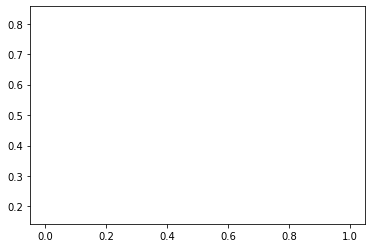

In [4]:
# Calculate Type Percents
urban_fares = urban["fare"].sum()
suburban_fares = suburban["fare"].sum()
rural_fares = rural["fare"].sum()
fares = [urban_fares,suburban_fares,rural_fares]
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "deepskyblue", "yellow"]
explode = (0.1, 0, 0)

plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type",  bbox={'facecolor':'0.7', 'pad':6})
plt.savefig("Pie.png")
plt.show()


plt.axis("equal")

## Total Rides by City Type

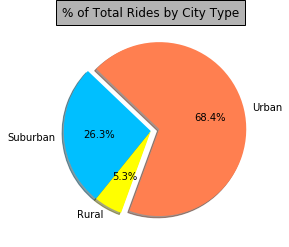

(-0.05, 1.05, -0.05, 1.05)

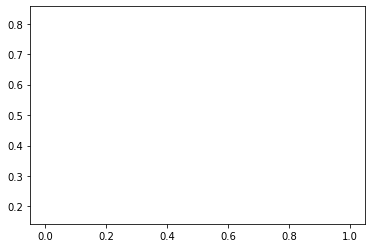

In [5]:
# Calculate Rides Type Percents
urban_fares = urban["ride_id"].count()
suburban_fares = suburban["ride_id"].count()
rural_fares = rural["ride_id"].count()
fares = [urban_fares,suburban_fares,rural_fares]
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "deepskyblue", "yellow"]
explode = (0.1, 0, 0)

plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Rides by City Type",  bbox={'facecolor':'0.7', 'pad':6})
plt.savefig("Pie1.png")
plt.show()


plt.axis("equal")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

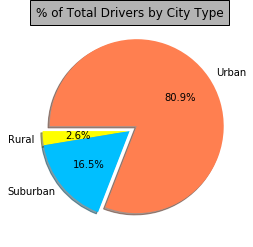

In [6]:
# Calculate Driver Percents
durban_count = urban["driver_count"].sum()
dsuburban_count = suburban["driver_count"].sum()
drural_count = rural["driver_count"].sum()
fares = [durban_count, dsuburban_count, drural_count]
driver_percents = 100*city_data_df.groupby(['type']).sum()['driver_count']/city_data_df['driver_count'].sum()
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow", "deepskyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(driver_percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type", bbox={'facecolor':'0.7', 'pad':6})
plt.savefig("Pie2.png")
plt.show()



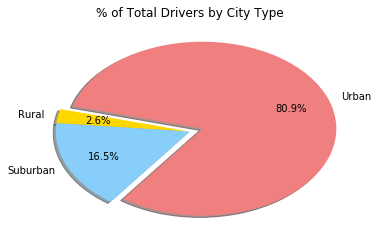

In [6]:
# Show Figure
plt.show()